# Detailed explanation of plotting functions
This tutorial gives an in-depth look at the `covid19pandas` package's built-in plotting functions. To see examples of them really in action, look at the quickstart tutorial.

## Data setup
First, import the package and get some data to work with. See the other tutorials for more on the data loading, selecting, and transformation functions.

In [1]:
import covid19pandas as cod

global_df = cod.get_data_jhu()
top_ten = cod.select_top_x_regions(
    data=global_df,
    data_col="cases",
    region_cols=["Country/Region"],
    x=10)

top_ten.tail()

These data were obtained from Johns Hopkins University (https://github.com/CSSEGISandData/COVID-19).


,date,Country/Region,cases
1185,2020-05-19,Russia,299941
1186,2020-05-19,Spain,232037
1187,2020-05-19,Turkey,151615
1188,2020-05-19,US,1528568
1189,2020-05-19,United Kingdom,250138


In [2]:
top_ten_daily = cod.calc_daily_change(
    data=top_ten,
    data_cols="cases",
    region_cols=["Country/Region"])

italy_with_daily = cod.select_regions(
    data=top_ten_daily,
    region_col="Country/Region",
    regions="Italy")

italy_with_daily.tail()

,date,Country/Region,cases,daily_cases
1144,2020-05-15,Italy,223885,789
1154,2020-05-16,Italy,224760,875
1164,2020-05-17,Italy,225435,675
1174,2020-05-18,Italy,225886,451
1184,2020-05-19,Italy,226699,813


# Plot multiple regions: `plot_lines`
This functions will plot x values versus y values as lines on a chart, with different lines for different regions as specified in a grouping column. The basic parameters are:
- `data`: The dataframe to plot data from.
- `x_col`: The name of the column with the x values.
- `y_col`: The name of the column with the y values.
- `group_col`: The name of the column with the grouping values.

Here's a basic plot:

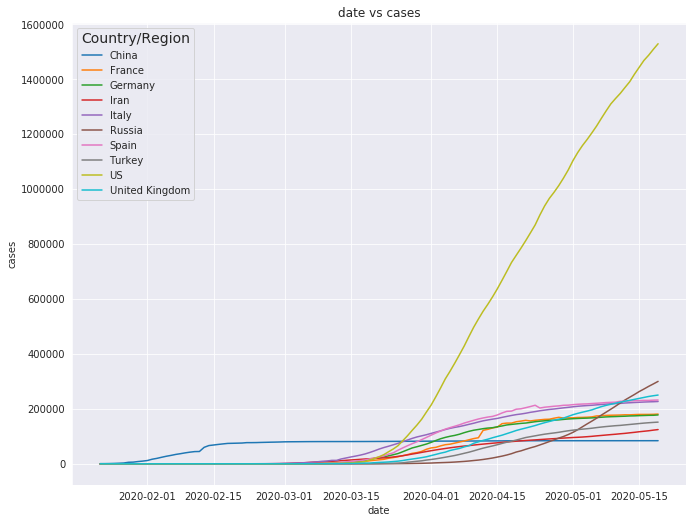

In [3]:
fig, ax = cod.plot_lines(
    data=top_ten,
    x_col="date",
    y_col="cases",
    group_col="Country/Region")

### Custom formatting
To control the order of the countries on the legend, you can pass a list of the unique values in the `group_col` column to the `legend_order` parameter, in the order you want them on the legend. The following example puts them in of current cumulative cases, from greatest to least.

Additionally, you can use the `x_lab`, `y_lab`, `title`, and `legend_title` parameters to set custom labels and titles for the plot. You can use the `y_logscale` parameter to put the y axis on a logarithmic scale. And, you can use the `dimensions` parameter to specify different plot dimensions and the `seaborn_style` parameter to specify a different Seaborn style.

Our plotting functions use Seaborn and Matplotlib under the hood. They return standard Matplotlib figure and axes objects. If you wish, you can manipulate those objects further.

For more details on the optional parameters, pass `plot_lines` to the Python `help` function: `help(cod.plot_lines)`. We've printed this out at the end of the tutorial.

Here is an example of using the formatting options for `plot_lines`:

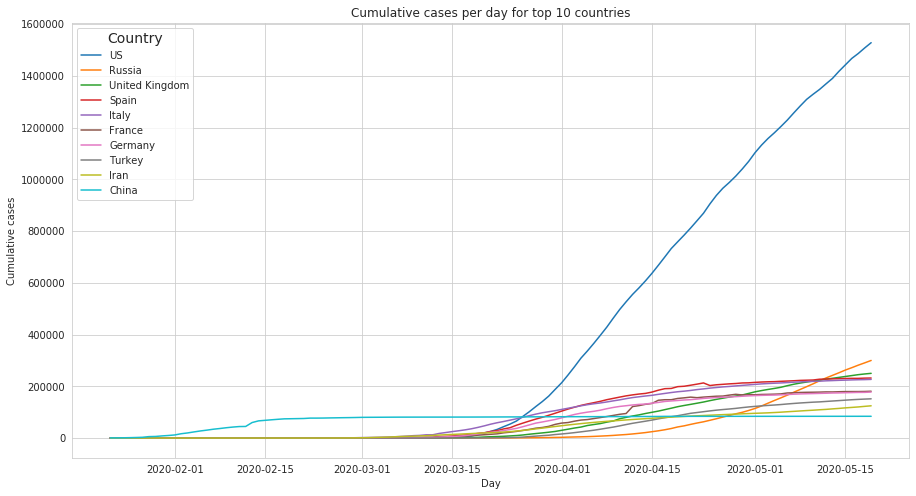

In [4]:
legend_order = top_ten.sort_values(by=["date", "cases"], ascending=False)["Country/Region"][:10].values

fig, ax = cod.plot_lines(
    data=top_ten,
    x_col="date",
    y_col="cases",
    group_col="Country/Region",
    x_lab="Day",
    y_lab="Cumulative cases",
    legend_order=legend_order,
    title="Cumulative cases per day for top 10 countries",
    legend_title="Country",
    dimensions=(15, 8),
    seaborn_style="whitegrid")

# Plot two data types with scales: `plot_lines_two_y`
Sometimes you want to plot two data types on the same graph, but they cover significantly different ranges of values. In those cases, it's useful to make a plot with the y axis marked for one data type's scale on one side, and the other data type's scale on the other side. That's what the `plot_lines_two_y` function is for.

These are the main parameters for the function:
- `data`: The dataframe to plot data from.
- `x_col`: The name of the column with the x values.
- `y1_col`: The name of the column with the first set of y values. These values' y scale will be on the left.
- `y2_col`: The name of the column with the other set of y values. These values' y scale will be on the right.

Here's a basic plot:

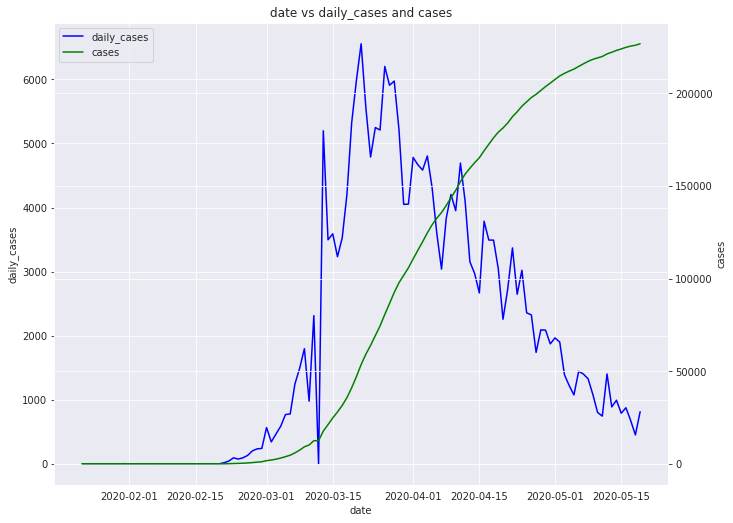

In [5]:
fig, axs = cod.plot_lines_two_y(
    data=italy_with_daily,
    x_col="date",
    y1_col="daily_cases",
    y2_col="cases")

### Custom formatting
Just like with `plot_lines`, you can use the `x_lab`, `y1_lab`, `y2_lab`, `title`, and `legend_title` parameters to set custom labels and titles for the plot. There is also a `legend_loc` parameter that you can use to manually set the legend location. There is no parameter to control the order of the labels on the legend; that is determined by which line is assigned to the left y axis and which is assigned to the right.

You can again use the `y_logscale` parameter to put the y axis on a logarithmic scale. And, you can still use the `dimensions` parameter to specify different plot dimensions and the `seaborn_style` parameter to specify a different Seaborn style.

This function also returns standard Matplotlib figure and axes objects. However, instead of just returning a single axes object, it returns a tuple of two axes objects--one for each y axis.

Again, for more details on the optional parameters, pass `plot_lines_two_y` to the Python `help` function: `help(cod.plot_lines_two_y)`. This is also printed out at the end of the tutorial.

Here is an example of custom formatting with `plot_lines_two_y`:

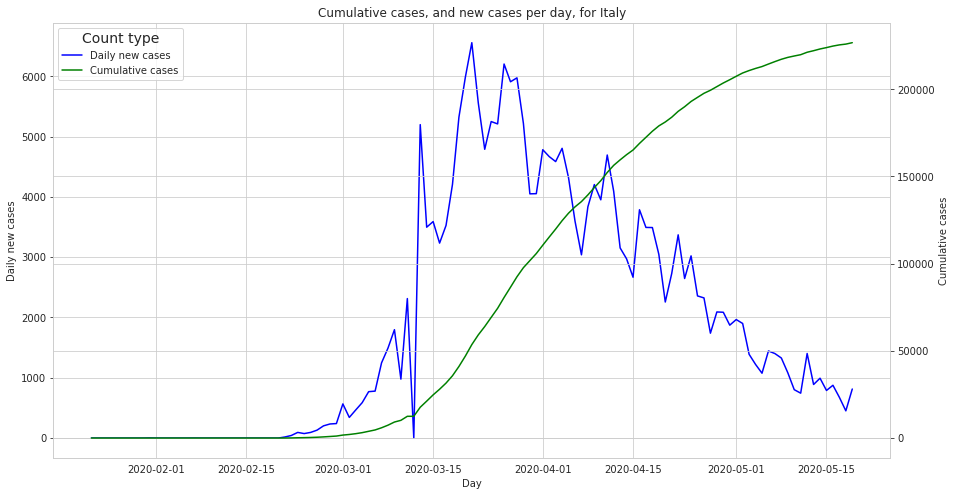

In [6]:
fig, ax = cod.plot_lines_two_y(
    data=italy_with_daily,
    x_col="date",
    y1_col="daily_cases",
    y2_col="cases",
    x_lab="Day",
    y1_lab="Daily new cases",
    y2_lab="Cumulative cases",
    title="Cumulative cases, and new cases per day, for Italy",
    legend_title="Count type",
    dimensions=(15, 8),
    seaborn_style="whitegrid")

# Full function documentation
For your convenience, we have printed the full docstrings for these two plotting functions.

In [7]:
help(cod.plot_lines)

Help on function plot_lines in module covid19pandas.plotters:

plot_lines(data, x_col, y_col, group_col, x_lab=None, y_lab=None, title=None, legend_title=None, legend_order=None, y_logscale=False, dimensions=(11, 8.5), seaborn_style='darkgrid')
    Plot the values in x_col versus the values in y_col, divided into different lines based on the values in group_col.
    
    Parameters:
    data (pandas.DataFrame): A dataframe with the data to plot. Must be in "long" format.
    x_col (str): The name of the column with the x values in it.
    y_col (str): The name of the column with the y values in it.
    group_col (str): The name of the column with the grouping values in it.
    x_lab (str, optional): Label for the x axis. Default None will use the x_col name.
    y_lab (str, optional): Label for the y axis. Default None will use the y_col name.
    title (str, optional): Title for the plot. Default None will cause one to be automatically generated based on column names.
    legend_title

In [8]:
help(cod.plot_lines_two_y)

Help on function plot_lines_two_y in module covid19pandas.plotters:

plot_lines_two_y(data, x_col, y1_col, y2_col, x_lab=None, y1_lab=None, y2_lab=None, title=None, legend_title=None, legend_loc='best', y_logscale=False, dimensions=(11, 8.5), seaborn_style='darkgrid')
    Plot the values in x_col versus the values in y1_col on the left y axis, and the values in y2_col on the right y axis.
    
    Parameters:
    data (pandas.DataFrame): A dataframe with the data to plot. Must be in "long" format.
    x_col (str): The name of the column with the x values in it.
    y1_col (str): The name of the column with the y values to plot on the left y axis.
    y2_col (str): The name of the column with the y values to plot on the right y axis.
    x_lab (str, optional): Label for the x axis. Default None will use the x_col name.
    y1_lab (str, optional): Label for the left y axis. Default None will use the y1_col name.
    y2_lab (str, optional): Label for the right y axis. Default None will us